In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MMDetection 설치
* pip install mmcv-full로 mmcv 설치
* pytorch 1.13으로 downgrade 필요
* mmdetection 2.x 설치 필요.   

In [2]:
# pytorch 버전 확인
import torch
print(torch.__version__)

2.0.0+cu118


In [3]:
# pytorch 버전 변경
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 694.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

In [4]:
#  mmcv-full 설치
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 5.3 MB/s eta 0:00:00


In [5]:
# mmdetection 설치(mmdetection 2.x branch 기반)
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 36063, done.
remote: Counting objects: 100% (714/714), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 36063 (delta 354), reused 535 (delta 261), pack-reused 35349
Receiving objects: 100% (36063/36063), 52.16 MiB | 34.66 MiB/s, done.
Resolving deltas: 100% (25287/25287), done.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-

In [1]:
# 런타임 다시 시작 후 실행
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.0+cu116 (CPU)


### Kaggle CVC-ClinicDB Dataset
* https://www.kaggle.com/datasets/balraj98/cvcclinicdb
* 대장 내시경 용종 segmentation 데이터

In [2]:
import os

# directory 구조 확인
# Original - 원본 대장내시경 이미지, Ground Truth - 용종 mask

DATA_ROOT_DIR = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp'
index = 0 
for dir in sorted(next(os.walk(DATA_ROOT_DIR))[1]):
    print('',dir)
    subdirs = os.path.join(DATA_ROOT_DIR, dir)
    for subdir in sorted(next(os.walk(subdirs))[1]):
        print('  |--'+subdir)
        sub_subdirs = os.path.join(subdirs, subdir)
        for sub_subdir in sorted(next(os.walk(sub_subdirs))[2]):
            print('       |-- '+sub_subdir)
            index += 1
            if index >10:
                continue

 .ipynb_checkpoints
 PNG
  |--.ipynb_checkpoints
  |--Ground Truth
       |-- 1.png
       |-- 10.png
       |-- 100.png
       |-- 101.png
       |-- 102.png
       |-- 103.png
       |-- 104.png
       |-- 105.png
       |-- 106.png
       |-- 107.png
       |-- 108.png
       |-- 109.png
       |-- 11.png
       |-- 110.png
       |-- 111.png
       |-- 112.png
       |-- 113.png
       |-- 114.png
       |-- 115.png
       |-- 116.png
       |-- 117.png
       |-- 118.png
       |-- 119.png
       |-- 12.png
       |-- 120.png
       |-- 121.png
       |-- 122.png
       |-- 123.png
       |-- 124.png
       |-- 125.png
       |-- 126.png
       |-- 127.png
       |-- 128.png
       |-- 129.png
       |-- 13.png
       |-- 130.png
       |-- 131.png
       |-- 132.png
       |-- 133.png
       |-- 134.png
       |-- 135.png
       |-- 136.png
       |-- 137.png
       |-- 138.png
       |-- 139.png
       |-- 14.png
       |-- 140.png
       |-- 141.png
       |-- 142.png
       |-

###  데이터 살펴보기 

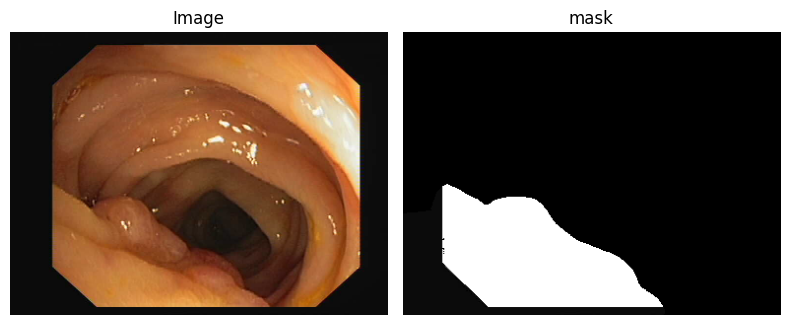

In [22]:
import matplotlib.pyplot as plt
import cv2

image_file_name = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Original/1.png'
mask_file_name = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/1.png'

def plot_image_pair(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    image1 = cv2.cvtColor(cv2.imread(image1), cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(cv2.imread(image2), cv2.COLOR_BGR2RGB)
    axes[0].imshow(image1)
    axes[0].axis('off')
    axes[0].set_title('Image')

    axes[1].imshow(image2)
    axes[1].axis('off')
    axes[1].set_title('mask')

    plt.tight_layout()
    plt.show()
plot_image_pair(image_file_name, mask_file_name)

### image id와 image 절대 경로, mask 파일의 절대 경로 한번에 볼 수 있는 DataFrame 생성. 
* DataFrame기반의 meta 정보 생성. 
* 해당 DataFrame으로 이미지 시각화 
* 해당 DataFrame을 기반으로 train과 validation 용 image id 분리

In [3]:
import os
import glob

folder_path_img = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Original'  # 이미지 파일들이 있는 폴더의 경로
folder_path_mask = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth' 
extension = '*.png'  # 가져올 이미지 파일들의 확장자 

# 폴더 내의 이미지 파일들의 경로 가져오기
imagename_list = sorted(glob.glob(os.path.join(folder_path_img, extension)))
maskname_list = sorted(glob.glob(os.path.join(folder_path_mask, extension)))

# 이미지 파일들의 이름 가져오기
imageid_list = sorted([os.path.splitext(os.path.basename(file))[0] for file in imagename_list])

for id in imageid_list:
    print(id, end=' ')

1 10 100 101 102 103 104 105 106 107 108 109 11 110 111 112 113 114 115 116 117 118 119 12 120 121 122 123 124 125 126 127 128 129 13 130 131 132 133 134 135 136 137 138 139 14 140 141 142 143 144 145 146 147 148 149 15 150 151 152 153 154 155 156 157 158 159 16 160 161 162 163 164 165 166 167 168 169 17 170 171 172 173 174 175 176 177 178 179 18 180 181 182 183 184 185 186 187 188 189 19 190 191 192 193 194 195 196 197 198 199 2 20 200 201 202 203 204 205 206 207 208 209 21 210 211 212 213 214 215 216 217 218 219 22 220 221 222 223 224 225 226 227 228 229 23 230 231 232 233 234 235 236 237 238 239 24 240 241 242 243 244 245 246 247 248 249 25 250 251 252 253 254 255 256 257 258 259 26 260 261 262 263 264 265 266 267 268 269 27 270 271 272 273 274 275 276 277 278 279 28 280 281 282 283 284 285 286 287 288 289 29 290 291 292 293 294 295 296 297 298 299 3 30 300 301 302 303 304 305 306 307 308 309 31 310 311 312 313 314 315 316 317 318 319 32 320 321 322 323 324 325 326 327 328 329 33 33

In [5]:
import pandas as pd
DATA_ROOT_DIR = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG'

def make_meta_df(dataset_dir):
  # 개별 image당 모든 mask 절대 경로를 가져옴. 
  meta_df = pd.DataFrame({'image_id': imageid_list,
                          'image_name': imagename_list,
                          'mask_name': maskname_list})
  return meta_df

meta_df = make_meta_df(DATA_ROOT_DIR)

In [6]:
meta_df

,image_id,image_name,mask_name
0,1,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
1,10,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
2,100,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
3,101,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
4,102,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
...,...,...,...
607,95,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
608,96,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
609,97,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...
610,98,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...,/content/drive/MyDrive/Colab Notebooks/DLCV_Ne...


In [7]:
pd.set_option('display.max_colwidth', 300) #넓이 옵션
meta_df.head(3)

,image_id,image_name,mask_name
0,1,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Original/1.png,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/1.png
1,10,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Original/10.png,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/10.png
2,100,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Original/100.png,/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/100.png


### mask 이미지 파일을 기반으로 segmentation polygon과 bbox정보를 추출
* opencv의 findContours()를 이용하여 외곽선 정보 추출하고, 이를 기반으로 coco segmentation polygon 생성
* segmentation 정보를 기반으로 bbox 정보 생성. 

(288, 384, 3)


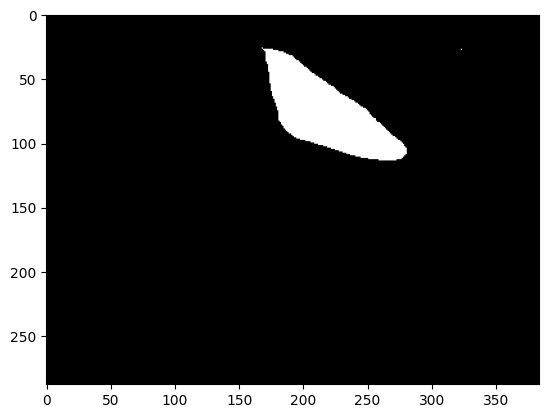

In [9]:
import matplotlib.pyplot as plt
import cv2

mask_file ='/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/575.png'
mask_array = cv2.imread(mask_file)
print(mask_array.shape)
plt.imshow(mask_array)

In [10]:
# findCountours()로 mask의 외곽선 좌표 추출. findContours()는 2차원 array로 입력 받을 수 있으므로 3차원 mask를 2차원으로 변환하여 입력.
contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [contour for contour in contours if contour.shape[0] > 2]
print(contours)

[array([[[168,  26]],

       [[171,  29]],

       [[171,  36]],

       [[172,  37]],

       [[172,  38]],

       [[173,  39]],

       [[173,  44]],

       [[174,  45]],

       [[174,  53]],

       [[175,  54]],

       [[175,  59]],

       [[176,  60]],

       [[176,  63]],

       [[177,  64]],

       [[177,  65]],

       [[178,  66]],

       [[178,  68]],

       [[179,  69]],

       [[179,  71]],

       [[180,  72]],

       [[180,  74]],

       [[181,  75]],

       [[181,  82]],

       [[183,  84]],

       [[183,  85]],

       [[185,  87]],

       [[185,  88]],

       [[189,  92]],

       [[190,  92]],

       [[193,  95]],

       [[194,  95]],

       [[195,  96]],

       [[197,  96]],

       [[198,  97]],

       [[201,  97]],

       [[202,  98]],

       [[205,  98]],

       [[206,  99]],

       [[208,  99]],

       [[209, 100]],

       [[211, 100]],

       [[212, 101]],

       [[215, 101]],

       [[216, 102]],

       [[218, 102]],

       [[

In [11]:
import numpy as np
# ravel()은 다차원을 1차원으로 변환. 
a1 = np.array([[1,2],
               [3,4]])
a1.ravel()

array([1, 2, 3, 4])

In [12]:
print([s.ravel().tolist() for s in contours])

[[168, 26, 171, 29, 171, 36, 172, 37, 172, 38, 173, 39, 173, 44, 174, 45, 174, 53, 175, 54, 175, 59, 176, 60, 176, 63, 177, 64, 177, 65, 178, 66, 178, 68, 179, 69, 179, 71, 180, 72, 180, 74, 181, 75, 181, 82, 183, 84, 183, 85, 185, 87, 185, 88, 189, 92, 190, 92, 193, 95, 194, 95, 195, 96, 197, 96, 198, 97, 201, 97, 202, 98, 205, 98, 206, 99, 208, 99, 209, 100, 211, 100, 212, 101, 215, 101, 216, 102, 218, 102, 219, 103, 221, 103, 222, 104, 224, 104, 225, 105, 227, 105, 228, 106, 230, 106, 231, 107, 233, 107, 234, 108, 236, 108, 237, 109, 240, 109, 241, 110, 244, 110, 245, 111, 250, 111, 251, 112, 258, 112, 259, 113, 272, 113, 273, 112, 276, 112, 280, 108, 280, 104, 278, 102, 278, 101, 275, 98, 274, 98, 271, 95, 270, 95, 259, 84, 258, 84, 256, 82, 256, 81, 255, 81, 251, 77, 251, 76, 248, 73, 247, 73, 246, 72, 245, 72, 242, 69, 241, 69, 239, 67, 238, 67, 237, 66, 236, 66, 234, 64, 233, 64, 232, 63, 231, 63, 230, 62, 229, 62, 223, 56, 222, 56, 221, 55, 220, 55, 217, 52, 216, 52, 214, 50, 2

In [13]:
if contours[0].shape[0] <= 2:
  print('####### contours[0] shape is less than 2 #######')
polygon = [s.ravel().tolist() for s in contours]
print(polygon)

[[168, 26, 171, 29, 171, 36, 172, 37, 172, 38, 173, 39, 173, 44, 174, 45, 174, 53, 175, 54, 175, 59, 176, 60, 176, 63, 177, 64, 177, 65, 178, 66, 178, 68, 179, 69, 179, 71, 180, 72, 180, 74, 181, 75, 181, 82, 183, 84, 183, 85, 185, 87, 185, 88, 189, 92, 190, 92, 193, 95, 194, 95, 195, 96, 197, 96, 198, 97, 201, 97, 202, 98, 205, 98, 206, 99, 208, 99, 209, 100, 211, 100, 212, 101, 215, 101, 216, 102, 218, 102, 219, 103, 221, 103, 222, 104, 224, 104, 225, 105, 227, 105, 228, 106, 230, 106, 231, 107, 233, 107, 234, 108, 236, 108, 237, 109, 240, 109, 241, 110, 244, 110, 245, 111, 250, 111, 251, 112, 258, 112, 259, 113, 272, 113, 273, 112, 276, 112, 280, 108, 280, 104, 278, 102, 278, 101, 275, 98, 274, 98, 271, 95, 270, 95, 259, 84, 258, 84, 256, 82, 256, 81, 255, 81, 251, 77, 251, 76, 248, 73, 247, 73, 246, 72, 245, 72, 242, 69, 241, 69, 239, 67, 238, 67, 237, 66, 236, 66, 234, 64, 233, 64, 232, 63, 231, 63, 230, 62, 229, 62, 223, 56, 222, 56, 221, 55, 220, 55, 217, 52, 216, 52, 214, 50, 2

In [8]:
# bounding box 정보를 polygon에서 추출. 
def get_bbox(segm):
  x_min = float("inf")
  y_min = float("inf")
  x_max = 0
  y_max = 0
  for s in segm:
    #segmentation polygon정보로 bounding box 정보 추출. 
    x, y, w, h = cv2.boundingRect(s)
    x_b = x + w
    y_b = y + h
    # 최소 0보다 크고, 무한대 보다는 좌표값이 작아야 함. 
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x_b)
    y_max = max(y_max, y_b)

  # 좌상단 좌표와, width, height 반환. 
  return x_min, y_min, x_max - x_min, y_max - y_min


In [10]:
# mask image를 기반으로 segmentation polygon과 bbox 정보를 추출하는 로직 함수화

def get_annotation_info(mask_path):
  mask_array = cv2.imread(mask_path)
  contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  segm = [contour for contour in contours if contour.shape[0] > 2]
  polygons = [s.ravel().tolist() for s in segm]
  xmin, ymin, bwidth, bheight = get_bbox(segm)
  return polygons, [xmin, ymin, bwidth, bheight]

polygons, bbox = get_annotation_info('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/Ground Truth/575.png')
print(polygons, bbox)

[[168, 26, 171, 29, 171, 36, 172, 37, 172, 38, 173, 39, 173, 44, 174, 45, 174, 53, 175, 54, 175, 59, 176, 60, 176, 63, 177, 64, 177, 65, 178, 66, 178, 68, 179, 69, 179, 71, 180, 72, 180, 74, 181, 75, 181, 82, 183, 84, 183, 85, 185, 87, 185, 88, 189, 92, 190, 92, 193, 95, 194, 95, 195, 96, 197, 96, 198, 97, 201, 97, 202, 98, 205, 98, 206, 99, 208, 99, 209, 100, 211, 100, 212, 101, 215, 101, 216, 102, 218, 102, 219, 103, 221, 103, 222, 104, 224, 104, 225, 105, 227, 105, 228, 106, 230, 106, 231, 107, 233, 107, 234, 108, 236, 108, 237, 109, 240, 109, 241, 110, 244, 110, 245, 111, 250, 111, 251, 112, 258, 112, 259, 113, 272, 113, 273, 112, 276, 112, 280, 108, 280, 104, 278, 102, 278, 101, 275, 98, 274, 98, 271, 95, 270, 95, 259, 84, 258, 84, 256, 82, 256, 81, 255, 81, 251, 77, 251, 76, 248, 73, 247, 73, 246, 72, 245, 72, 242, 69, 241, 69, 239, 67, 238, 67, 237, 66, 236, 66, 234, 64, 233, 64, 232, 63, 231, 63, 230, 62, 229, 62, 223, 56, 222, 56, 221, 55, 220, 55, 217, 52, 216, 52, 214, 50, 2

### coco 포맷으로 변환하기

* images id 디렉토리를 기반으로 image_id 생성. 
* 개별 image id의 images 디렉토리에서 개별 image 파일의 width, height 추출
* 개별 image id의 masks 디렉토리에서 여러 mask 파일들을 get_anntotation_info()로 polygon 형태의 segmentation과 bbox 정보 추출
* 개별 object의 id는 0부터 증가하는 순차적인 index로 생성.
* 별도의 coco image와 json 생성을 위한 디렉토리를 생성하고, meta_df를 이용하여 train, valid 용 coco json 생성. 


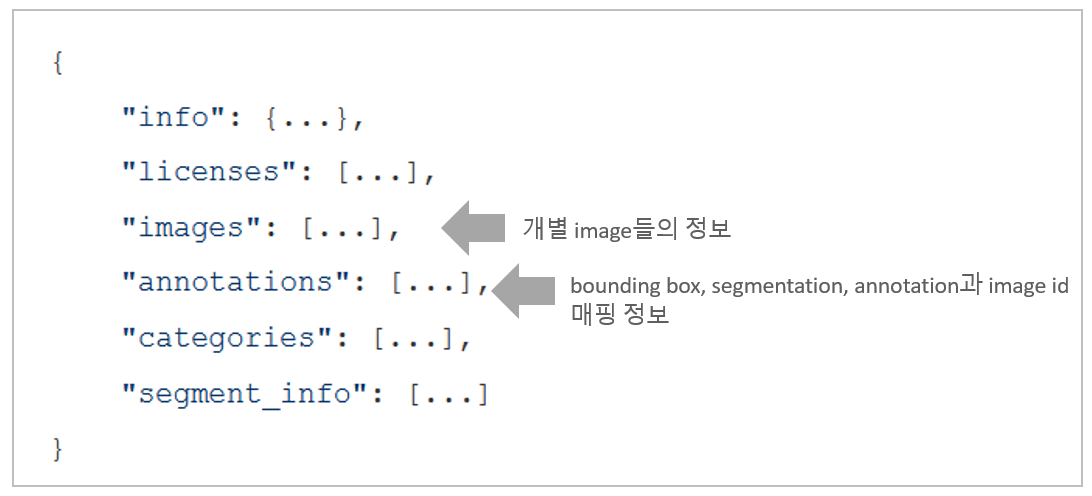

In [11]:
import cv2
import json

def convert_polyp_to_coco(data_root_dir, image_ids, out_file):
  
    images = []
    annotations = []
    categories = []
    obj_index = 0
  
    for image_id in image_ids:
        image_path = os.path.join(data_root_dir, 'Original/' + image_id + '.png')
        file_name = image_id + '.png'
        height, width = cv2.imread(image_path).shape[0:2] 
      
        image_info = dict(file_name=file_name,
                          height=height,
                          width=width,
                          id=image_id)
        images.append(image_info)

        # 개별 image에 있는 여러 mask 이미지 파일을 segmentation, bbox로 변환하여 annotation dict 정보 생성. 
        mask_path = os.path.join(data_root_dir, 'Ground Truth/' + image_id + '.png')
        # 개별 image에 있는 여러 mask 이미지 파일을 기반으로 annotation dict 생성. 
        segmentation, bbox = get_annotation_info(mask_path)
          
        # 만일 segmentation이 None이면 coco 데이터로 만들지 않음. 
        if segmentation is None:
          continue
        annotation = dict(segmentation=segmentation,
                          area=bbox[2]*bbox[3] , # 반드시 계산 필요.
                          iscrowd=0,
                          bbox=bbox,
                          category_id=0,
                          image_id=image_id,
                          id = obj_index)
        # 계산된 annotation dict 정보를 annotations list에 추가. 
        annotations.append(annotation)
        # object 고유 id 증가. 
        obj_index += 1
        print('image id:', image_id, 'annotation is done')
      
      # images 와 annotations, categories list를 최종 Dict로 변환하고 json 형식으로 출력. 
    coco_format_json = dict(
        images = images,
        annotations = annotations,
        categories = [{'id':0, 'name':'polyp'}]
        )
      
      # json 파일로 출력. 
      #mmcv.dump(coco_format_json, out_file)
    with open(out_file, 'w') as json_out_file:
      json.dump(coco_format_json, json_out_file)

In [12]:
# https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/pipelines/loading.py def _poly2mask(self, mask_ann, img_h, img_w):
import pycocotools.mask as maskUtils

def check_polygons(mask_filepath, polygons, img_h, img_w):
  try:
    rles = maskUtils.frPyObjects(polygons, img_h, img_w)
    rle = maskUtils.merge(rles)
  except Exception as e:
    print('##### 오류 polygon 발생 #####:',  e,polygons)
    print('오류 mask file명:', mask_filepath)

In [13]:
# mask image를 기반으로 segmentation polygon과 bbox 정보를 추출하는 로직 함수화
def get_annotation_info(mask_path):
  mask_array = cv2.imread(mask_path)
  contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  segm = [contour for contour in contours if contour.shape[0] > 2]
  polygons = [s.ravel().tolist() for s in segm]
  #polygons = [s.ravel().tolist() for s in segm]
  check_polygons(mask_path, polygons, mask_array.shape[0], mask_array.shape[1])
  xmin, ymin, bwidth, bheight = get_bbox(segm)
  # 만약 polygons가 Null이면 segmentation과 bbox annotation을 None으로 반환. 
  if polygons == []:
    return None, None 
  # polygons가 Null이 아니면 정상적으로 segmentation과 bbox annotation 반환. 
  else: 
    return polygons, [xmin, ymin, bwidth, bheight]

In [14]:
# 학습과 검증용 image id 데이터들을 추출. 
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(meta_df, test_size=0.1, random_state=2021)

train_ids = train_df['image_id'].to_list()
val_ids = val_df['image_id'].to_list()

In [21]:
convert_polyp_to_coco('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG', train_ids, '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train_coco.json')
convert_polyp_to_coco('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG', val_ids, '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/val_coco.json')

image id: 331 annotation is done
image id: 607 annotation is done
image id: 260 annotation is done
image id: 4 annotation is done
image id: 165 annotation is done
image id: 153 annotation is done
image id: 69 annotation is done
image id: 3 annotation is done
image id: 416 annotation is done
image id: 536 annotation is done
image id: 473 annotation is done
image id: 498 annotation is done
image id: 408 annotation is done
image id: 231 annotation is done
image id: 599 annotation is done
image id: 321 annotation is done
image id: 120 annotation is done
image id: 274 annotation is done
image id: 13 annotation is done
image id: 74 annotation is done
image id: 106 annotation is done
image id: 566 annotation is done
image id: 417 annotation is done
image id: 454 annotation is done
image id: 341 annotation is done
image id: 367 annotation is done
image id: 404 annotation is done
image id: 447 annotation is done
image id: 104 annotation is done
image id: 357 annotation is done
image id: 576 ann

In [15]:
import cv2
import json
import shutil

# mmdetection config에 맞추기 위해 이미지 파일을 별도의 디렉토리로 이동하는 코드 추가
def convert_polyp_to_coco(data_root_dir, image_ids, out_file, img_copy_dir):
  
    images = []
    annotations = []
    categories = []
    obj_index = 0
  
    for image_id in image_ids:
        image_path = os.path.join(data_root_dir, 'Original/' + image_id + '.png')
        file_name = image_id + '.png'
        height, width = cv2.imread(image_path).shape[0:2] 
      
        image_info = dict(file_name=file_name,
                          height=height,
                          width=width,
                          id=image_id)
        images.append(image_info)

        # 이미지를 특정 디렉토리로 복사
        shutil.copy(image_path, os.path.join(img_copy_dir, file_name))

        mask_path = os.path.join(data_root_dir, 'Ground Truth/' + image_id + '.png')
        # 개별 image에 있는 여러 mask 이미지 파일을 기반으로 annotation dict 생성. 
        segmentation, bbox = get_annotation_info(mask_path)
          
        # 만일 segmentation이 None이면 coco 데이터로 만들지 않음. 
        if segmentation is None:
          continue
        annotation = dict(segmentation=segmentation,
                          area=bbox[2]*bbox[3] , # 반드시 계산 필요.
                          iscrowd=0,
                          bbox=bbox,
                          category_id=0,
                          image_id=image_id,
                          id = obj_index)
        # 계산된 annotation dict 정보를 annotations list에 추가. 
        annotations.append(annotation)
        # object 고유 id 증가. 
        obj_index += 1
        print('image id:', image_id, 'annotation is done')
      
      # images 와 annotations, categories list를 최종 Dict로 변환하고 json 형식으로 출력. 
    coco_format_json = dict(
        images = images,
        annotations = annotations,
        categories = [{'id':0, 'name':'polyp'}]
        )
      
      # json 파일로 출력. 
      #mmcv.dump(coco_format_json, out_file)
    with open(out_file, 'w') as json_out_file:
      json.dump(coco_format_json, json_out_file)

In [23]:
convert_polyp_to_coco('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG', train_ids, '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train_coco.json', '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train')
convert_polyp_to_coco('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG', val_ids, '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/val_coco.json', '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/val')

image id: 331 annotation is done
image id: 607 annotation is done
image id: 260 annotation is done
image id: 4 annotation is done
image id: 165 annotation is done
image id: 153 annotation is done
image id: 69 annotation is done
image id: 3 annotation is done
image id: 416 annotation is done
image id: 536 annotation is done
image id: 473 annotation is done
image id: 498 annotation is done
image id: 408 annotation is done
image id: 231 annotation is done
image id: 599 annotation is done
image id: 321 annotation is done
image id: 120 annotation is done
image id: 274 annotation is done
image id: 13 annotation is done
image id: 74 annotation is done
image id: 106 annotation is done
image id: 566 annotation is done
image id: 417 annotation is done
image id: 454 annotation is done
image id: 341 annotation is done
image id: 367 annotation is done
image id: 404 annotation is done
image id: 447 annotation is done
image id: 104 annotation is done
image id: 357 annotation is done
image id: 576 ann

### pycocotools를 이용하여 변환된 coco json의 segmentation 시각화
* coco format으로 잘 변환되었는지 확인하기 위해 pycocotools로 특정 image id의 image filename및 segmentation 정보를 추출한 뒤 이를 시각화 

In [16]:
from pycocotools.coco import COCO

coco_val = COCO('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/val_coco.json')


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [17]:
# category id와 image id 출력. 
catIds = coco_val.getCatIds(catNms=['polyp']);
print(catIds)
# oco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds =coco_val.getImgIds(catIds=catIds)
print(imgIds)
print(len(imgIds))

[0]
['453', '592', '560', '140', '333', '37', '202', '515', '387', '146', '518', '283', '455', '491', '358', '591', '59', '294', '226', '124', '180', '545', '542', '432', '2', '303', '286', '436', '565', '419', '101', '210', '475', '552', '589', '241', '434', '414', '401', '506', '211', '192', '423', '452', '588', '128', '263', '326', '505', '568', '355', '611', '10', '495', '63', '548', '535', '334', '421', '584', '338', '484']
62


In [27]:
# image id에 대한 image 정보와 해당 image의 object별에 annotation 정보 추출. 
img = coco_val.loadImgs(val_ids)[0]
print(img['id'])
annIds = coco_val.getAnnIds(imgIds=[img['id']], catIds=[0], iscrowd=None)
print(annIds)
anns = coco_val.loadAnns(annIds)
print(anns)
print(len(anns))

140
[0]
[{'segmentation': [[273, 62, 272, 63, 264, 63, 263, 64, 259, 64, 258, 65, 253, 65, 252, 66, 246, 66, 245, 67, 239, 67, 238, 68, 236, 68, 235, 69, 232, 69, 231, 70, 230, 70, 229, 71, 225, 71, 224, 72, 220, 72, 219, 73, 216, 73, 215, 74, 213, 74, 212, 75, 211, 75, 210, 76, 208, 76, 207, 77, 205, 77, 203, 79, 202, 79, 201, 80, 200, 80, 198, 82, 197, 82, 196, 83, 195, 83, 194, 84, 193, 84, 191, 86, 190, 86, 188, 88, 187, 88, 186, 89, 186, 90, 183, 93, 183, 94, 182, 95, 182, 96, 181, 97, 181, 98, 180, 99, 180, 100, 179, 101, 179, 102, 178, 103, 178, 106, 177, 107, 177, 108, 176, 109, 176, 111, 174, 113, 174, 114, 166, 122, 165, 122, 163, 124, 162, 124, 162, 125, 159, 128, 159, 129, 158, 130, 158, 131, 157, 132, 157, 134, 156, 135, 156, 137, 155, 138, 154, 138, 154, 139, 153, 140, 153, 142, 152, 143, 152, 149, 151, 150, 151, 156, 150, 157, 150, 172, 151, 173, 151, 175, 152, 176, 152, 177, 153, 178, 153, 179, 154, 180, 154, 181, 155, 182, 155, 183, 156, 184, 156, 185, 160, 189, 160, 1

In [26]:
import numpy as np

def get_polygon_xy(ann_seg):
  polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
  polygon_y = [x for index, x in enumerate(ann_seg) if index % 2 == 1]
  polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
  polygon_xy = np.array(polygon_xy, np.int32)
  return polygon_xy

def get_mask(image_array_shape, polygon_xy):
  mask = np.zeros(image_array_shape)
  masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1)
  
  return masked_polygon

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:, :, c] = np.where(mask == 1,
                              image[:, :, c] *
                              (1 - alpha) + alpha * color[c] * 255,
                              image[:, :, c])
  return image

# ann_seg_list에 있는 object들의 segmentation에 따라 instance segmentation 시각화. 
def draw_segment(image_array, ann_seg_list, color_list, alpha):
  draw_image = image_array.copy()
  mask_array_shape = draw_image.shape[0:2]

  # list형태로 입력된 segmentation 정보들을 각각 시각화
  for index, ann_seg in enumerate(ann_seg_list):
    # polygon 좌표로 변환. 
    polygon_xy = get_polygon_xy(ann_seg)
    # mask 정보 변환
    masked_polygon = get_mask(mask_array_shape, polygon_xy)

    # segmentation color와 외곽선용 color 선택 
    color_object = color_list[np.random.randint(len(color_list))]
    color_contour = color_list[np.random.randint(len(color_list))]
    # masking 적용. 
    masked_image = apply_mask(draw_image, masked_polygon, color_object, alpha=0.6)
    # 외곽선 적용. 
    s_mask_int = (masked_polygon*255).astype("uint8")
    contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    masked_image = cv2.drawContours(masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

  return masked_image

In [28]:
color_list = [
              (0, 255, 0),
              (255, 0, 0),
              (0, 0, 255)
]
anns = coco_val.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(ann_seg_list)
print(len(ann_seg_list))

[[273, 62, 272, 63, 264, 63, 263, 64, 259, 64, 258, 65, 253, 65, 252, 66, 246, 66, 245, 67, 239, 67, 238, 68, 236, 68, 235, 69, 232, 69, 231, 70, 230, 70, 229, 71, 225, 71, 224, 72, 220, 72, 219, 73, 216, 73, 215, 74, 213, 74, 212, 75, 211, 75, 210, 76, 208, 76, 207, 77, 205, 77, 203, 79, 202, 79, 201, 80, 200, 80, 198, 82, 197, 82, 196, 83, 195, 83, 194, 84, 193, 84, 191, 86, 190, 86, 188, 88, 187, 88, 186, 89, 186, 90, 183, 93, 183, 94, 182, 95, 182, 96, 181, 97, 181, 98, 180, 99, 180, 100, 179, 101, 179, 102, 178, 103, 178, 106, 177, 107, 177, 108, 176, 109, 176, 111, 174, 113, 174, 114, 166, 122, 165, 122, 163, 124, 162, 124, 162, 125, 159, 128, 159, 129, 158, 130, 158, 131, 157, 132, 157, 134, 156, 135, 156, 137, 155, 138, 154, 138, 154, 139, 153, 140, 153, 142, 152, 143, 152, 149, 151, 150, 151, 156, 150, 157, 150, 172, 151, 173, 151, 175, 152, 176, 152, 177, 153, 178, 153, 179, 154, 180, 154, 181, 155, 182, 155, 183, 156, 184, 156, 185, 160, 189, 160, 190, 162, 192, 162, 193, 17

140


(-0.5, 383.5, 287.5, -0.5)

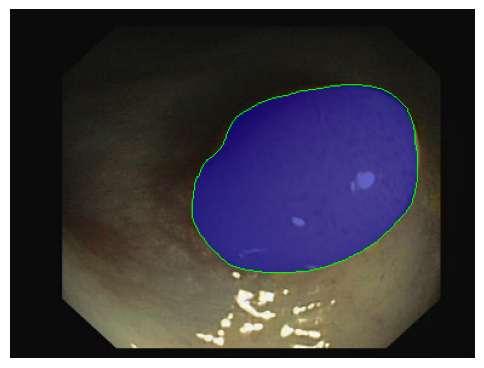

In [30]:
import matplotlib.pyplot as plt
import cv2

# 원본 이미지 시각화 
val_image_id = val_df['image_id'].iloc[0]
print(val_image_id)

annIds = coco_val.getAnnIds(imgIds=[val_image_id], catIds=[0], iscrowd=None)
anns = coco_val.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in anns]

val_image_name = val_df[val_df['image_id']==val_image_id]['image_name'].to_list()
image_array = cv2.cvtColor(cv2.imread(val_image_name[0]), cv2.COLOR_BGR2RGB)

# coco segmentation 정보를 기반으로 segmentation 적용한 이미지 시각화 
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)
plt.figure(figsize=(6, 6))
plt.imshow(masked_image)
plt.axis('off')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


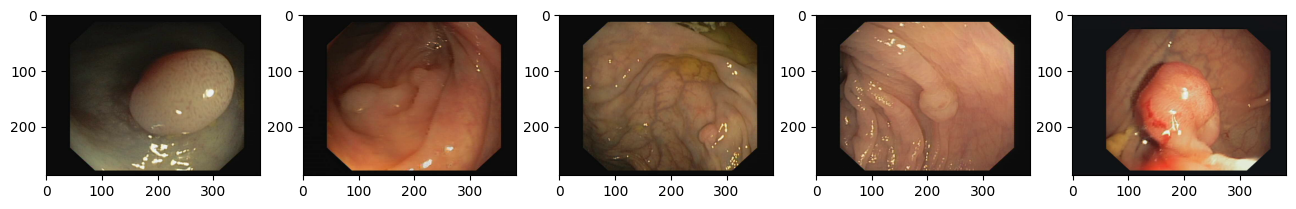

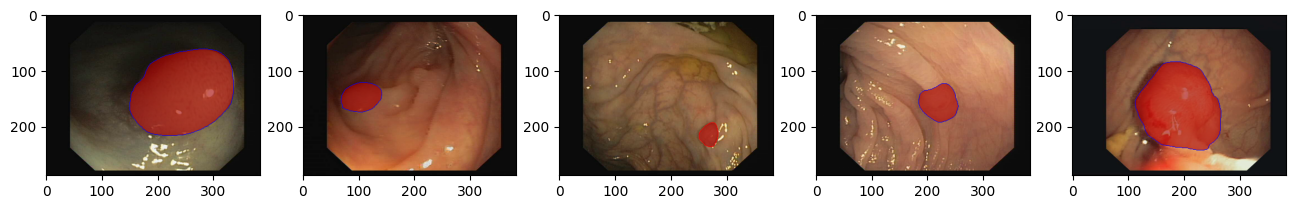

In [29]:
def get_coco_masked_image(coco, image_id, image_name):
  annIds = coco.getAnnIds(imgIds=[image_id], catIds=[0], iscrowd=None)
  anns = coco.loadAnns(annIds)
  # segmentation 정보만 별도로 추출. 
  ann_seg_list = [ann['segmentation'][0] for ann in anns]

  image_array = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)

  # coco segmentation 정보를 기반으로 segmentation 적용한 이미지 시각화 
  masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)

  return masked_image

def show_coco_masked_image(coco, data_df, image_id_list, cols=5):

  figure, axs = plt.subplots(nrows=1, ncols=cols, figsize=(16, 12))
  for i in range(cols):
    image_id = image_id_list[i]
    image_name = data_df[data_df['image_id'] == image_id]['image_name'].to_list()[0]
    masked_image = get_coco_masked_image(coco, image_id, image_name)

    axs[i].imshow(masked_image)

def show_coco_image(data_df, image_id_list, cols=5):

  figure, axs = plt.subplots(nrows=1, ncols=cols, figsize=(16, 12))
  for i in range(cols):
    image_id = image_id_list[i]
    image_name = data_df[data_df['image_id'] == image_id]['image_name'].to_list()[0]
    
    axs[i].imshow(cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB))

coco_train = COCO('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train_coco.json')
coco_val= COCO('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/val_coco.json')

show_coco_image(val_df, val_ids[0:5], cols=5)  
show_coco_masked_image(coco_val, val_df, val_ids[0:5], cols=5)


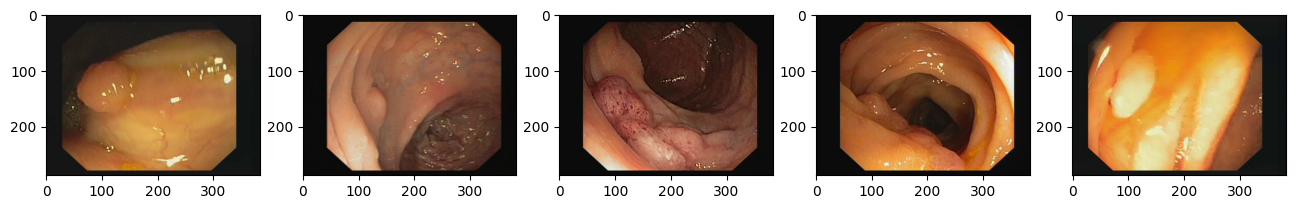

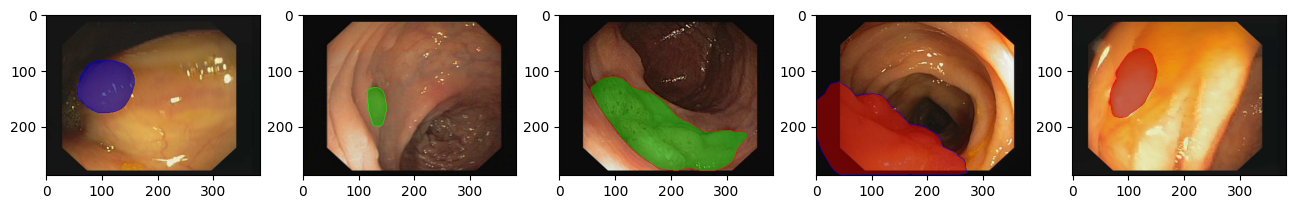

In [43]:
show_coco_image(train_df, train_ids[0:5], cols=5)  
show_coco_masked_image(coco_train, train_df, train_ids[0:5], cols=5)

### Pretrained 모델 다운로드, Config 설정

In [28]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬. 
!cd mmdetection; mkdir checkpoints

In [29]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2023-05-14 10:30:58--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.214, 8.25.82.209, 8.25.82.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  15.4MB/s    in 16s     

2023-05-14 10:31:15 (15.3 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [30]:
!ls -lia /content/mmdetection/checkpoints

total 248148
4985791 drwxr-xr-x  2 root root      4096 May 14 10:30 .
4980957 drwxr-xr-x 19 root root      4096 May 14 10:30 ..
4985792 -rw-r--r--  1 root root 254089599 Nov  2  2021 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [34]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [30]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class PolypDataset(CocoDataset):
  CLASSES = ['polyp']

In [35]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

In [36]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'PolypDataset'
cfg.data_root = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/'

cfg.data.train.type = 'PolypDataset'
cfg.data.train.data_root ='/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/'
cfg.data.train.ann_file = 'train_coco.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'PolypDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/'
cfg.data.val.ann_file = 'val_coco.json'
cfg.data.val.img_prefix = 'val'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

cfg.load_from = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정 (bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 15
cfg.checkpoint_config.interval = 15

# epochs 횟수
cfg.runner.max_epochs = 15

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

In [53]:
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

### 데이터 세트 내부 변수 값 확인 및 Train 수행
* build_dataset(config)로 생성된 Dataset의 내부 변수값을 확인. 

In [37]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train, valid 용 Dataset 생성. 
datasets_train = [build_dataset(cfg.data.train)]
datasets_val = [build_dataset(cfg.data.val)]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [36]:
datasets_train 

[
 PolypDataset Train dataset with number of images 550, and instance counts: 
 +-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 | category  | count | category | count | category | count | category | count | category | count |
 +-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 |           |       |          |       |          |       |          |       |          |       |
 | 0 [polyp] | 550   |          |       |          |       |          |       |          |       |
 +-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+]

In [81]:
print(datasets_train[0])
print(datasets_val[0])


PolypDataset Train dataset with number of images 550, and instance counts: 
+-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
| category  | count | category | count | category | count | category | count | category | count |
+-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
|           |       |          |       |          |       |          |       |          |       |
| 0 [polyp] | 550   |          |       |          |       |          |       |          |       |
+-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+

PolypDataset Train dataset with number of images 62, and instance counts: 
+-----------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
| category  | count | category | count | category | count | category | count | category | count |
+-----------+-------+----------+-------+----------+-------+----

In [57]:
datasets_train[0].__dict__.keys()

dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'seg_suffix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [41]:
datasets_train[0].img_prefix, datasets_train[0].data_root, datasets_train[0].ann_file

('/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train',
 '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/',
 '/content/drive/MyDrive/Colab Notebooks/DLCV_New/Polyp/PNG/coco_output/train_coco.json')

In [ ]:
datasets_train[0].pipeline

In [38]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets_train[0].CLASSES
print(model.CLASSES)

['polyp']


In [ ]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets_train, cfg, distributed=False, validate=True)

2023-05-14 12:33:51,680 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-14 12:33:51,691 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2023-05-14 12:33:51,937 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logits.bias

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 62/62, 6.2 task/s, elapsed: 10s, ETA:     0s

2023-05-14 13:28:48,853 - mmdet - INFO - Evaluating bbox...
2023-05-14 13:28:48,886 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.775
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.965
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.882
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.729
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.864
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).


In [64]:
!ls -lia /content/tutorial_exps

total 983600
2366700 drwxr-xr-x 2 root root      4096 May 14 08:52 .
1835052 drwxr-xr-x 1 root root      4096 May 14 06:36 ..
2367928 -rw-r--r-- 1 root root 503543435 May 14 08:52 epoch_12.pth
2367399 -rw-r--r-- 1 root root 503543435 May 14 06:20 epoch_1.pth
2367930 lrwxrwxrwx 1 root root        12 May 14 08:52 latest.pth -> epoch_12.pth
2367933 -rw-r--r-- 1 root root     92481 May 14 08:52 None.log.json


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Inference 수행. 

In [65]:
from mmdet.apis import inference_detector, show_result_pyplot

checkpoint_file = '/content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/tutorial_exps/epoch_12.pth


### inference 이미지 Custom 시각화


In [73]:
import numpy as np

labels_to_names_seq =  {0:'nucleus'}
  
COLORS = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [76]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
def get_detected_img(model, img_array,  score_threshold=0.3, draw_box=True, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.  
  results = inference_detector(model, img_array)
  bbox_results = results[0]
  seg_results = results[1]

  # results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이미지 시각화 
  for result_ind, bbox_result in enumerate(bbox_results):
    if len(bbox_result) == 0:
      continue
    
    mask_array_list = seg_results[result_ind]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(bbox_result)):
      # 좌상단, 우하단 좌표 추출. 
      if bbox_result[i, 4] > score_threshold:
        left = int(bbox_result[i, 0])
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2])
        bottom = int(bbox_result[i, 3])
        caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], bbox_result[i, 4])
        if draw_box:
          cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
          cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
        # masking 시각화 적용. class_mask_array는 image 크기 shape의  True/False값을 가지는 2차원 array
        class_mask_array = mask_array_list[i] 
        masked_roi = draw_img[class_mask_array]
        color_index = np.random.randint(0, len(COLORS)-1) #color 임의 지정
        # color를 class별로 지정
        #color_index = result_ind % len(COLORS)
        color = COLORS[color_index]

        # apply_mask()함수를 적용시 수행 시간이 상대적으로 오래 걸림. 
        #draw_img = apply_mask(draw_img, class_mask_array, color, alpha=0.4)
        
        # 원본 이미지의 masking 될 영역에 mask를 특정 투명 컬러로 적용
        draw_img[class_mask_array] = ([0.4*color[0], 0.4*color[1], 0.4*color[2]] + 0.6 * masked_roi).astype(np.uint8)
        
        if is_print:
          print(caption)
  
  return draw_img

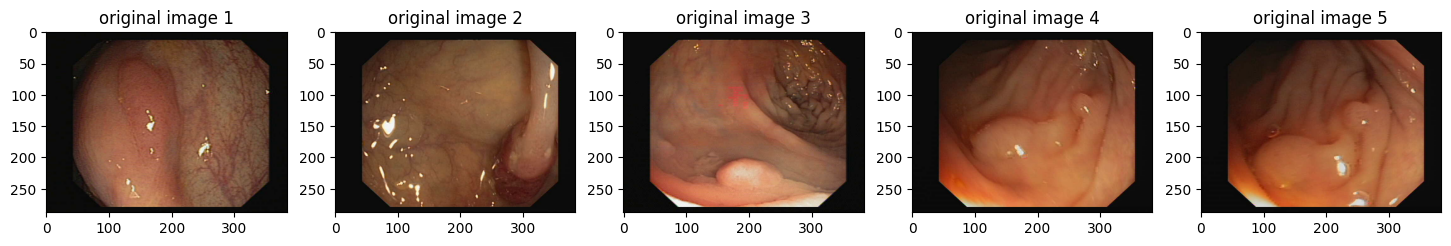

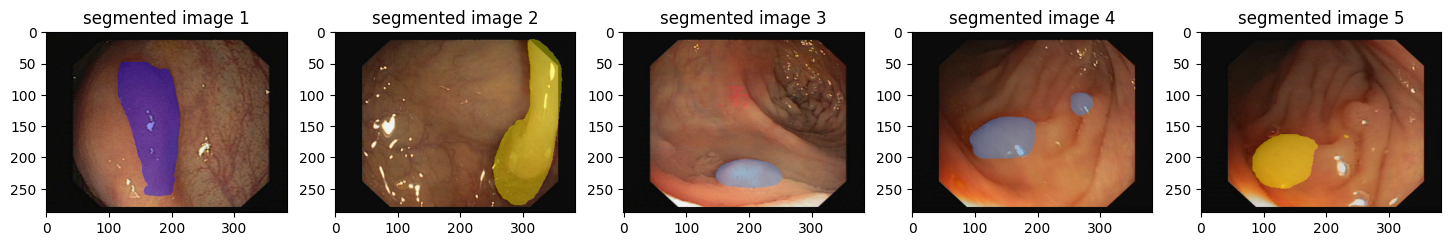

In [77]:
import matplotlib.pyplot as plt

COLS = 5
val_image_names = val_df['image_name'].iloc[5:10].to_list()

# 원본 이미지 보기
figure, axs = plt.subplots(nrows=1, ncols=COLS, figsize=(18, 12))
for i in range(COLS):
  img_arr = cv2.imread(val_image_names[i])
  img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

  axs[i].imshow(img_rgb)
  axs[i].set_title('original image '+str(i+1))

# inference mask detected 된 이미지 보기
figure, axs = plt.subplots(nrows=1, ncols=COLS, figsize=(18, 12))
for i in range(COLS):
  img_arr = cv2.imread(val_image_names[i])
  detected_img = get_detected_img(model_ckpt, img_arr,  score_threshold=0.3, draw_box=False, is_print=False)
  detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

  axs[i].imshow(detected_img)
  axs[i].set_title('segmented image '+str(i+1))